In [103]:
# import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
# First we check the structure and organisatio of each data
data_files = [file for file in os.listdir("./Fitabase_Data_4.12.16-5.12.16") if file.endswith(".csv")]
data_files.sort()
for f in data_files: 
    df = pd.read_csv(os.path.join("./Fitabase_Data_4.12.16-5.12.16",f)) 
    num_users = len(df["Id"].unique())
    print("*"*60)
    print(f"\n{f}\n{df.dtypes} \n")
    print(f"\n{f}\n{df.head()} \n")
    print(f"The shape of the data is {df.shape}")
    print(f"The nuber of users is {num_users}")
    print("*"*60 + "\n")

# flush out unwanted variables
del df, num_users

************************************************************

dailyActivity_merged.csv
Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object 


dailyActivity_merged.csv
           Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366    4/12/2016       13162           8.50             8.50   
1  1503960366    4/13/2016       10735           6.97             6.97   
2  1503960366    4/14/2016       10460           6.74             6.74   
3  1503960366    4/15/2016        9

In [59]:
# We can see that the daily infomations are integrated in the file named dailyActivity_merged.csv
# Another thing we can conclude from the the code is that not all the user used all the service
# Based on the result we know there are 
# 33 users track their daily activity
# 24 users track their sleep
# 14 users track their H.R.
# 8 users track their weights

dailyActivity_merged_df = pd.read_csv(os.path.join("./Fitabase_Data_4.12.16-5.12.16", "dailyActivity_merged.csv")) 
sleepDay_merged_df = pd.read_csv(os.path.join("./Fitabase_Data_4.12.16-5.12.16", "sleepDay_merged.csv"))
heartrate_seconds_merged_df = pd.read_csv(os.path.join("./Fitabase_Data_4.12.16-5.12.16", "heartrate_seconds_merged.csv"))
weightLogInfo_merged_df = pd.read_csv(os.path.join("./Fitabase_Data_4.12.16-5.12.16", "weightLogInfo_merged.csv"))

Activity_set = set(dailyActivity_merged_df["Id"].unique())
sleepDay_set = set(sleepDay_merged_df["Id"].unique())
heartrate_set = set(heartrate_seconds_merged_df["Id"].unique())
weight_set = set(weightLogInfo_merged_df["Id"].unique())


In [61]:
# To further explore we know

# there are overall 33 users
print(len(Activity_set.union(sleepDay_set, heartrate_set, weight_set)))

# 24 (72%) users track both activity and sleep 
print(len(Activity_set.intersection(sleepDay_set)))

# 14 users track both activity and H.R. 
print(len(Activity_set.intersection(heartrate_set)))

# 12 users track activity, sleep and H.R. 
print(len(Activity_set.intersection(sleepDay_set,heartrate_set)))

# 3 users track activity, sleep, H.R. and weight
print(len(Activity_set.intersection(sleepDay_set,heartrate_set, weight_set)))

33
24
14
12
3


In [107]:
# Since there are 33 users who track daily activity 
# and 24 users track both daily activity and daily sleep 
# therefore we can merge these two data together
# that's convert the daily activilty and sleep data into right format and merge them together
dailyActivity_merged_df["Date"] = pd.to_datetime(dailyActivity_merged_df["ActivityDate"])
sleepDay_merged_df["Date"] = pd.to_datetime(sleepDay_merged_df["SleepDay"])
daily_data = dailyActivity_merged_df.merge(right=sleepDay_merged_df, how="inner", left_on=["Id", "Date"], right_on=["Id", "Date"]) 
print(daily_data.dtypes) 
print(daily_data.shape) 

Id                                   int64
ActivityDate                        object
TotalSteps                           int64
TotalDistance                      float64
TrackerDistance                    float64
LoggedActivitiesDistance           float64
VeryActiveDistance                 float64
ModeratelyActiveDistance           float64
LightActiveDistance                float64
SedentaryActiveDistance            float64
VeryActiveMinutes                    int64
FairlyActiveMinutes                  int64
LightlyActiveMinutes                 int64
SedentaryMinutes                     int64
Calories                             int64
Date                        datetime64[ns]
SleepDay                            object
TotalSleepRecords                    int64
TotalMinutesAsleep                   int64
TotalTimeInBed                       int64
dtype: object
(413, 20)


In [108]:
# Clean the data, since there are no string inside we drop the N/A and the duplicates in our data 

daily_data = daily_data.drop(["ActivityDate", "SleepDay"], axis=1)
daily_data = daily_data.drop_duplicates()
print(daily_data.dtypes) 
print(daily_data.shape)

Id                                   int64
TotalSteps                           int64
TotalDistance                      float64
TrackerDistance                    float64
LoggedActivitiesDistance           float64
VeryActiveDistance                 float64
ModeratelyActiveDistance           float64
LightActiveDistance                float64
SedentaryActiveDistance            float64
VeryActiveMinutes                    int64
FairlyActiveMinutes                  int64
LightlyActiveMinutes                 int64
SedentaryMinutes                     int64
Calories                             int64
Date                        datetime64[ns]
TotalSleepRecords                    int64
TotalMinutesAsleep                   int64
TotalTimeInBed                       int64
dtype: object
(410, 18)


TypeError: object of type 'NoneType' has no len()

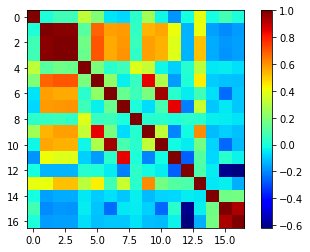

In [114]:
# Now we can see some correlation

corr_map = daily_data.drop("Date", axis = 1).corr()
corr_labels = daily_data.columns.to_list()
corr_labels = corr_labels.remove('Date')
plt.imshow(corr_map, cmap="jet")
plt.colorbar()
plt.xticks(ticks= range(len(corr_labels)),labels= corr_labels, rotation = 90)
plt.yticks(ticks= range(len(corr_labels)),labels= corr_labels)
plt.show()

In [111]:
# Therefor we can merge these 2 data based in their Id and Date
len(daily_data.columns)
print(daily_data.columns)
corr_map.shape